# Problem Statement:-In this dataset of "Insurance_claim_fraud_detection" we have 39 independent variables and 1 dependent variable which is "Fraud_reported".This is the problem of binary classification.

# Importing Important libraries of python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
#checking the shape of the dataset
df.shape

(1000, 40)

Our dataset has 1000 rows and 40 columns

In [5]:
#Checking the information about each column of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#Checking for the null values in the datset.
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#Lets drop the column "_c39" since all the rows are nan in that column.
df=df.drop(['_c39'], axis = 1)

In [8]:
#Lets see first five rows of the dataset.
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
#We know that each policy has unique policy number,hence we are removing that column
df=df.drop(['policy_number'], axis = 1)

In [10]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [11]:
#lets check the different count of categorical variable.
df["police_report_available"].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [12]:
#lets check the different count of categorical variable.
df["auto_make"].value_counts()

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [13]:
#lets check the different count of categorical variable.
df["auto_model"].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
95                27
E400              27
F150              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
X5                23
Ultima            23
Civic             22
Highlander        22
Silverado         22
Fusion            21
TL                20
ML350             20
Corolla           20
Impreza           20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [14]:
len(df["auto_model"].value_counts())

39

In [15]:
#lets check the different count of categorical variable.
df["umbrella_limit"].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [16]:
#checking the information of various columns of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

# Lets do some data visualisation

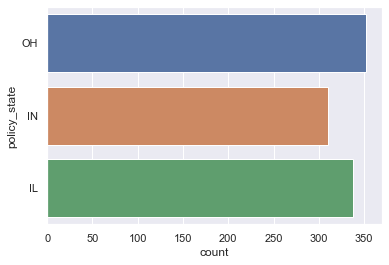

In [17]:
#lets plot the countplot for the policy_state column of the dataset.
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="policy_state", data=df)

We can see that "OH" & "IL" dominates in the policy_state_column.

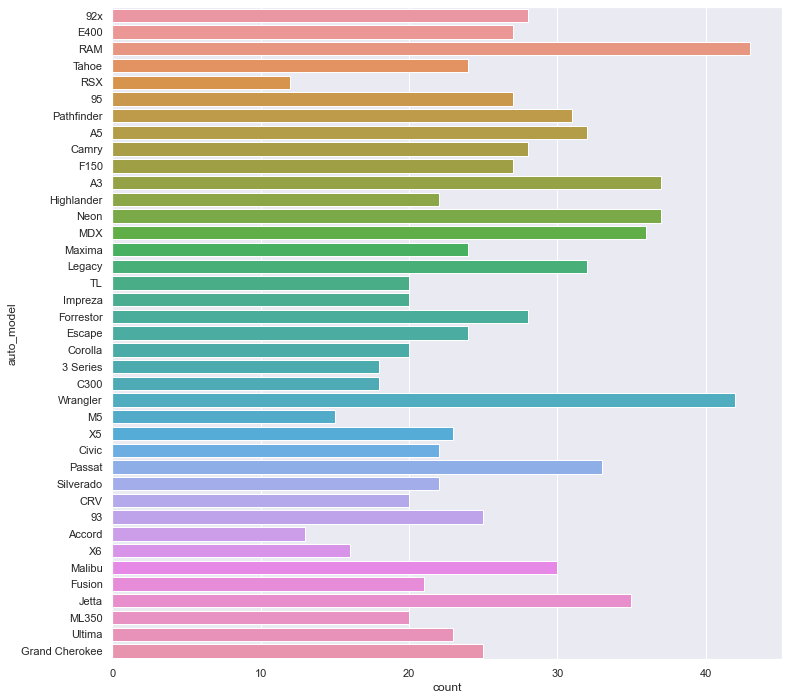

In [18]:
#lets plot the countplot for the auto_model  column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="auto_model", data=df)


"RAM","Wrangler","Jetta" are the popular auto_model from the given dataset.

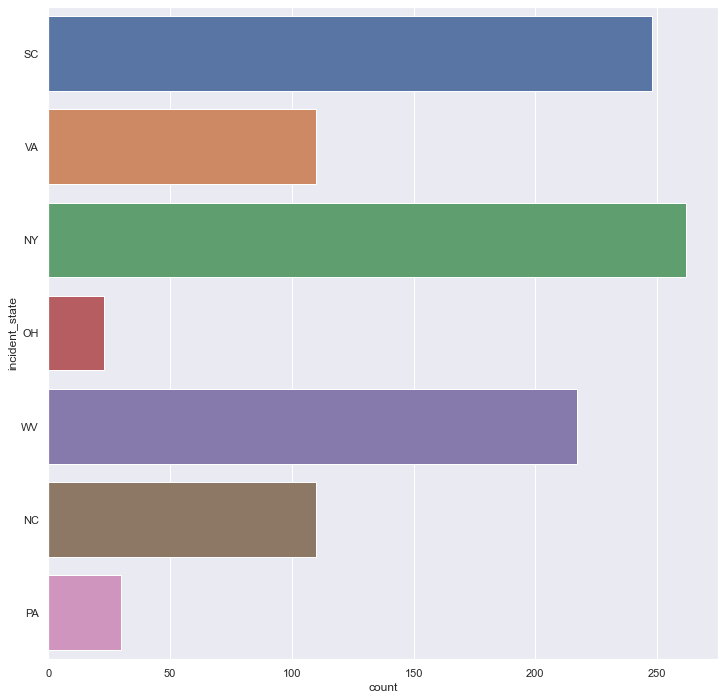

In [19]:
#lets plot the countplot for the incident_state  column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="incident_state", data=df)


We can see that most incident_states are "NY" &  "SC".

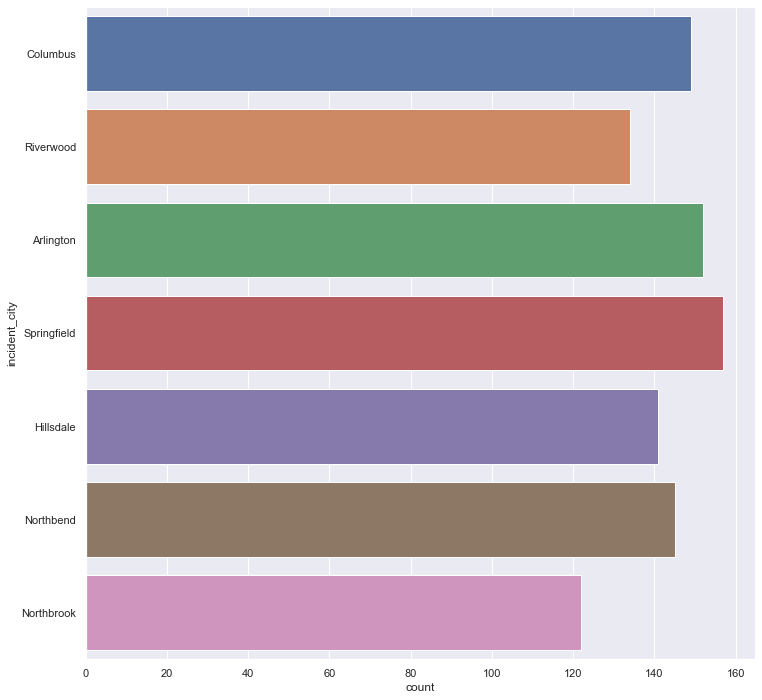

In [20]:
#lets plot the countplot for the incident_city  column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="incident_city", data=df)

From the above countplot we can say that almost all cities are appeared approximately the same time.

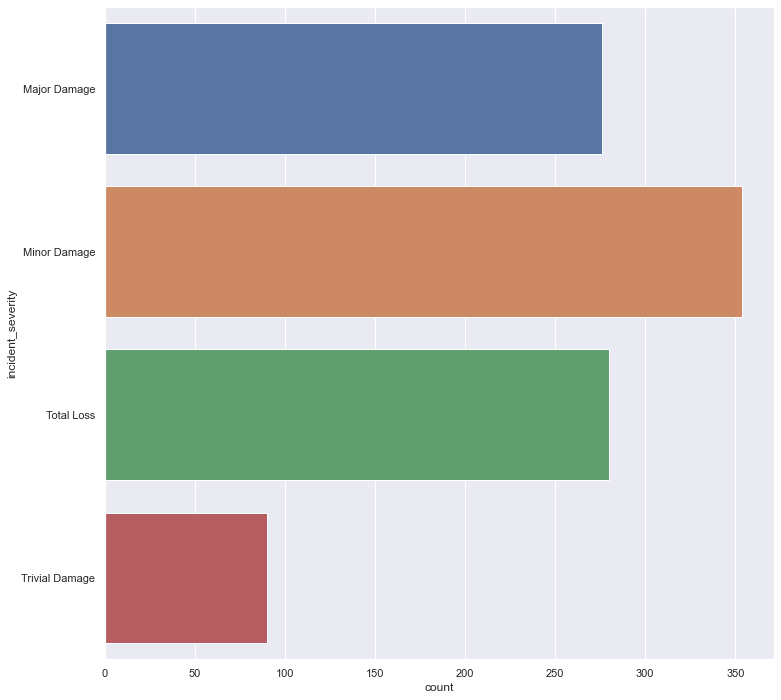

In [21]:
#lets plot the countplot for the incident_severity   column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="incident_severity", data=df)

We can see from the above countplot that majority of incident_severity belongs to the Minor damage category

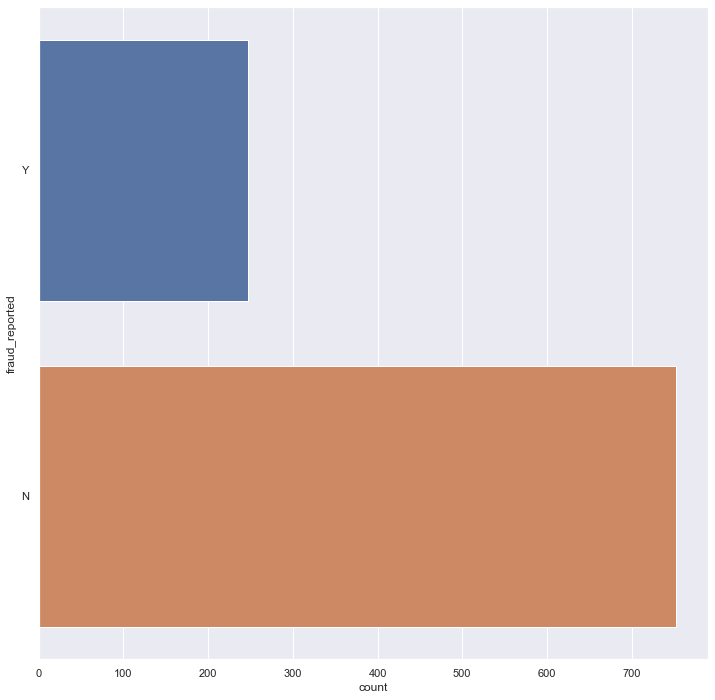

In [22]:
#lets plot the countplot for the fraud_reported  column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="fraud_reported", data=df)

From the above plot we can say that maximum times Frauds are not reported.

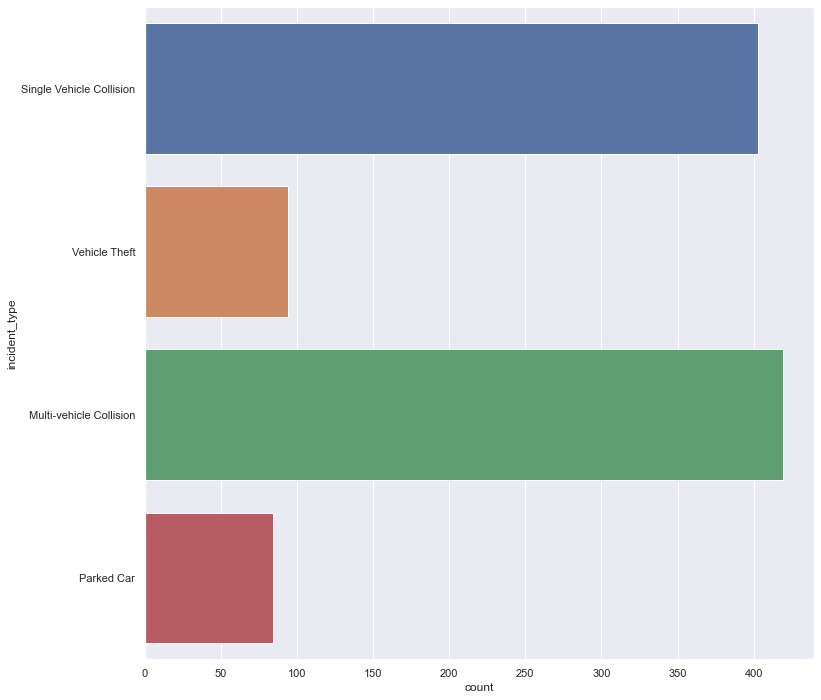

In [23]:
#lets plot the countplot for the incident_type column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="incident_type", data=df)

Single vehicle collision & Multi vehicle collision are two most occurred incident type.

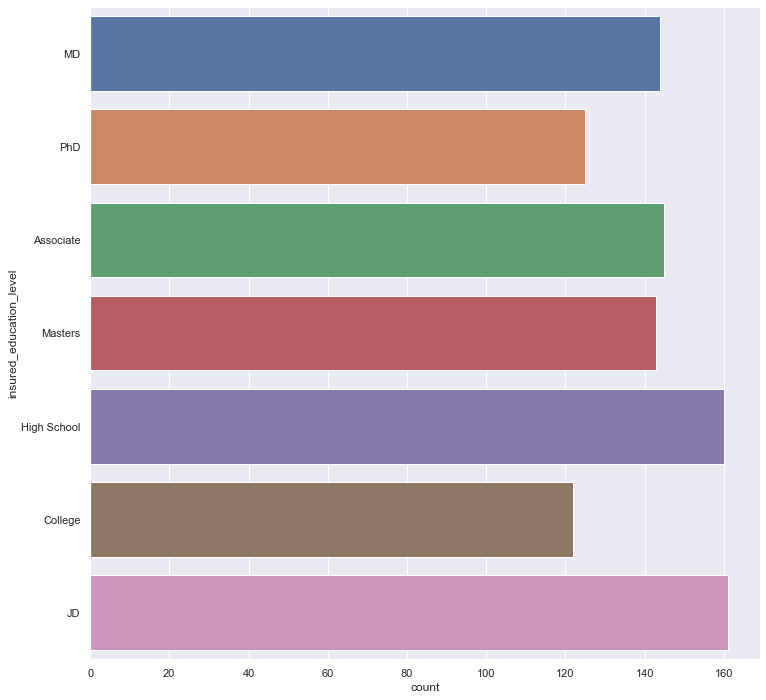

In [24]:
#lets plot the countplot for the insured_education_level column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="insured_education_level", data=df)

'JD',"High School","MD" are the most appeared insured_education_level categories in our dataset.

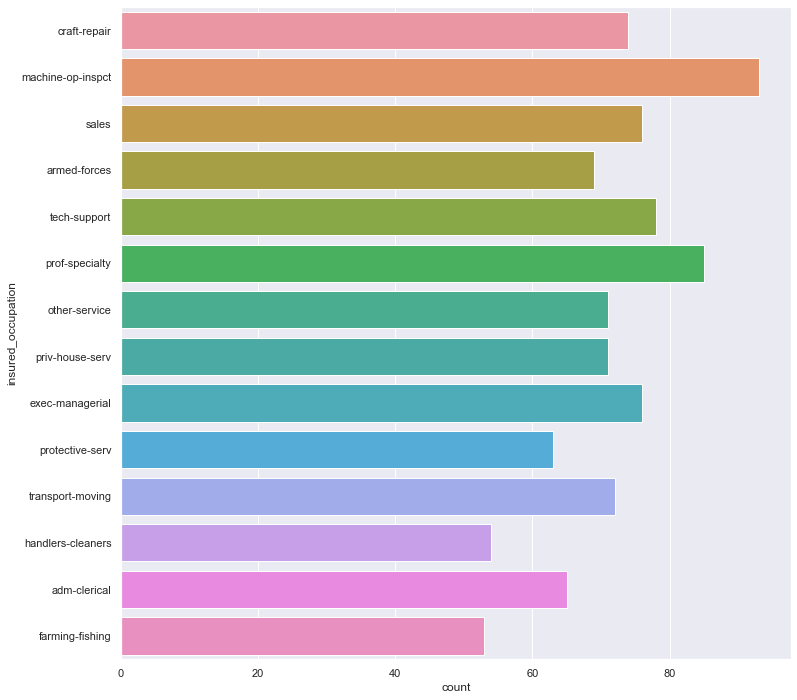

In [25]:
#lets plot the countplot for the insured_occupation  column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="insured_occupation", data=df)

'machine-op-inspct',"Prof-speciality","exec-managerial" are few most appeared categories in insured_occupation column.

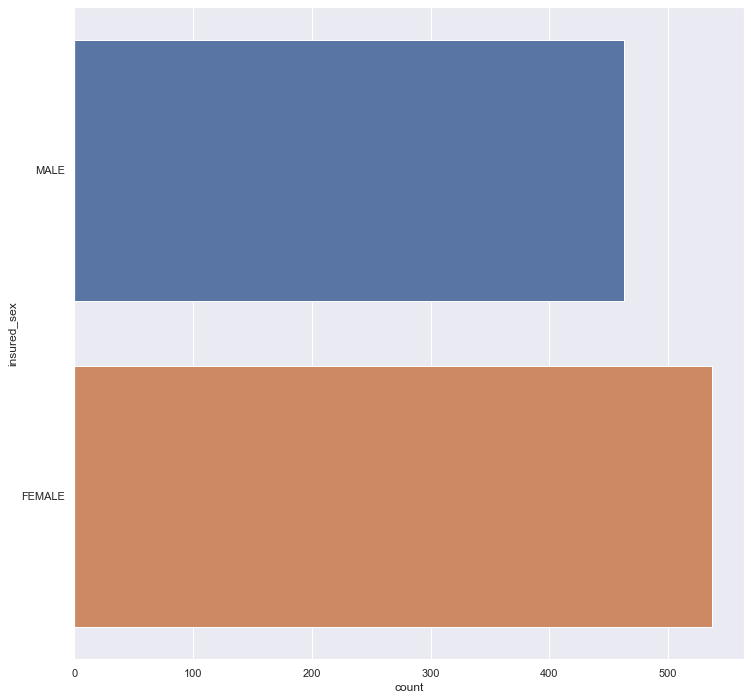

In [26]:
#lets plot the countplot for the insured_sex  column of the dataset.
ax = plt.subplots(figsize=(12,12 ))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="insured_sex", data=df)

"Female" is the dominating gender in insured_sex in our dataset.

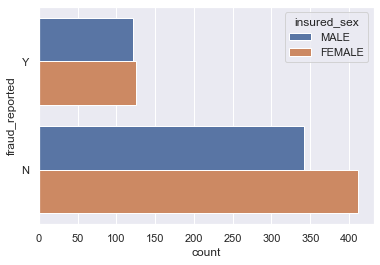

In [27]:
#count plot for the insured_sex and the fraud_reported.
ax = sns.countplot(y="fraud_reported", hue="insured_sex", data=df)

From above countplot we can say that :-
    
Fraud_reported_yes  --   Both MALE & FEMALE reported fraud approximately equal times.
Fraud_reported_no   --   Females have reported most of the times.
    

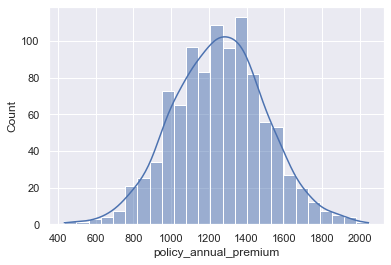

In [28]:
#Lets plot the  policy_annual_premium  distribution curve.  
sns.histplot(data=df, x="policy_annual_premium", kde=True)

Great! policy_annual_premium is almost normally distributed.

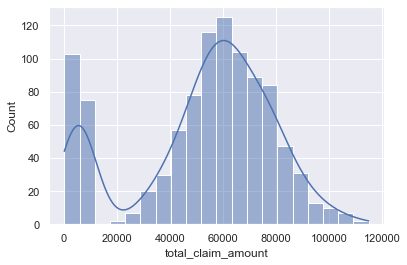

In [29]:
#Lets plot the total_claim_amount  distribution curve.  
sns.histplot(data=df, x="total_claim_amount", kde=True)

We can see that distribution cuve of "total_claim_amount" is skewed to the left side.

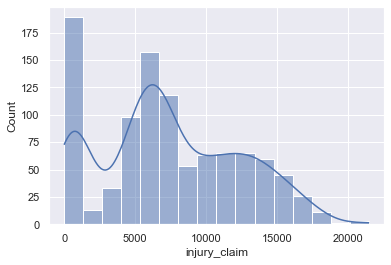

In [30]:
#Lets plot the injury_claim  distribution curve.  
sns.histplot(data=df, x="injury_claim", kde=True)

We can see that probability distribution curve of "injury_claim" is liitle skewed to the right side.

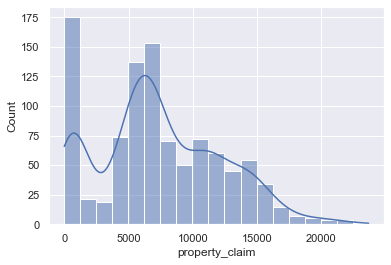

In [31]:
#Lets plot the property_claim  distribution curve.  
sns.histplot(data=df, x="property_claim", kde=True)

We can see that probability distribution curve of the property_claim is skewed to the right side.

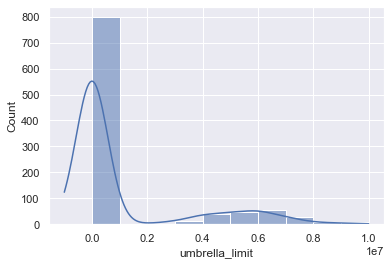

In [32]:
#Lets plot the umbrella_limit distribution curve.  
sns.histplot(data=df, x="umbrella_limit", kde=True)

From above probability distribution curve of "umbrella_limit" it is visible that it is skewed to the right side.

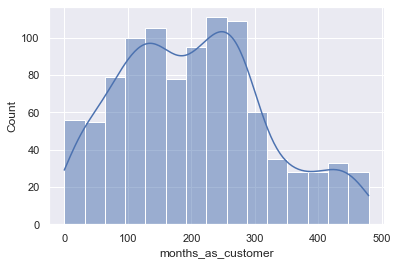

In [33]:
#Lets plot the months_as_customer distribution curve.  
sns.histplot(data=df, x="months_as_customer", kde=True)

Here we can see that "months_as_customer" is little skewed to the right side.

In [34]:
#Let us convert policy_bind_date from object datatype to datetime64 Datatype
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])

In [35]:
#We are creating two new columns of Year and Month by extracting data from policy_bind_date column
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month

In [36]:
#Lets drop the column of policy_bind_date since we have extracted the year and month.
df=df.drop(['policy_bind_date'], axis = 1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [38]:
df["insured_hobbies"].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [39]:
#We are dropping insured_hobbies & auto_model column since it does not have any information related to the insurance.
df=df.drop(['insured_hobbies'], axis = 1)
df=df.drop(['auto_model'], axis = 1)
df=df.drop(['policy_csl'], axis = 1)



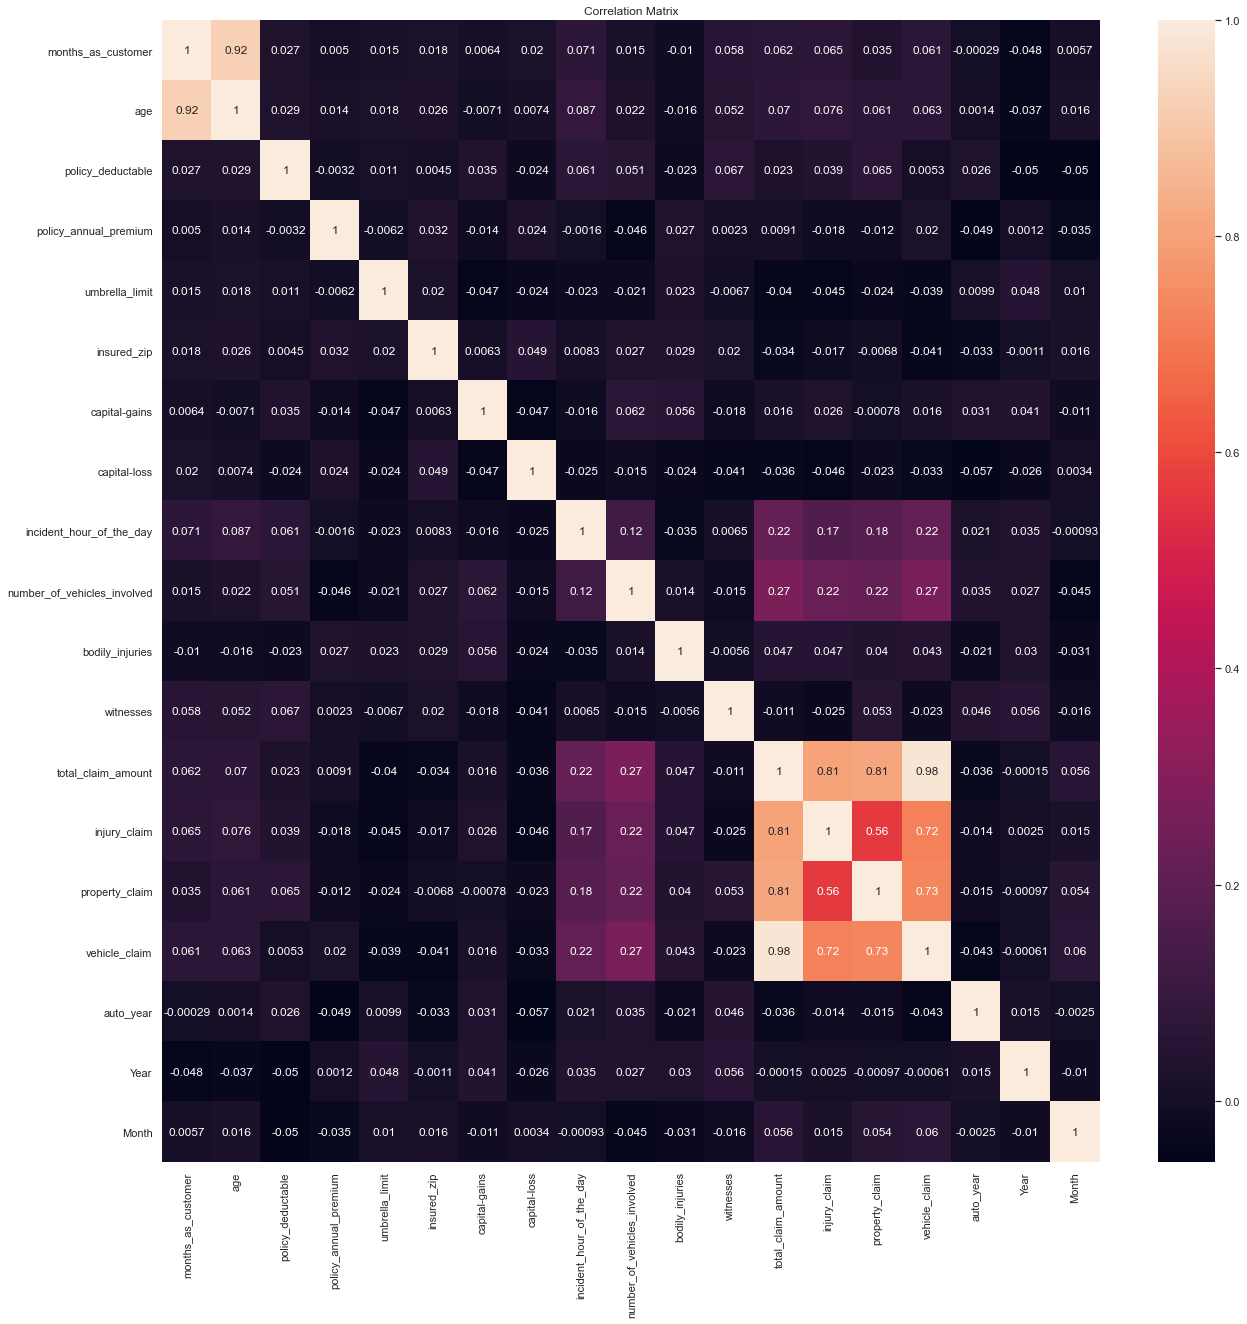

In [40]:
#lets plot the heatmap to check the correlation between dependent and independent variables.
corr_mat=df.corr()
plt.figure(figsize=[21,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

We can see that few of our columns show high correlation so we will drop one of each column which has correlation with other to deal with the multicollinearity issue.
 
 1. 'age' & 'month as customer' has high correlation with each other. (0.92)
 2. 'injury_claim' & "total_claim_amount" (0.81)
 3. 'property_claim' & "total_claim_amount" (0.81)
 4. 'vehicle_claim' & "total_claim_amount"  (0.98)
 5. "injury_claim' & "vehicle_claim" (0.72)
 6.  "property_claim" & "vehicle_claim" (0.73)

In [41]:
#Dropping the columns to reduce the effect of multicollinearity.
df=df.drop(['injury_claim'], axis = 1)
df=df.drop(['property_claim'], axis = 1)
df=df.drop(['vehicle_claim'], axis = 1)
df=df.drop(['auto_year'], axis = 1)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_date      

In [43]:
#We are mapping the damage with numbers according to the order.
incident_map = {
    'Minor Damage' : 1,
    'Total Loss' : 3,
    'Major Damage' : 2,
    "Trivial Damage":0
}
df["incident_severity"] = df['incident_severity'].map(incident_map)

In [44]:
#We are mapping the education_level with numbers according to the order.
education_map = {
    'High School' : 1,
    'Masters' : 3,
    'College' : 2,
    "Associate":4,
    "MD":5,
    "JD":6,
    "PhD":7
}
df["insured_education_level"] = df['insured_education_level'].map(education_map)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   int64  
 9   insured_occupation           1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_date      

In [46]:
#Creating dummy columns for the nominal categorical variables and dropping one column from each to counter multicollinearity.
categorical_cols = ["policy_state","incident_state","incident_city","fraud_reported","incident_type","insured_sex","authorities_contacted","police_report_available","collision_type"] 
df = pd.get_dummies(df, columns = categorical_cols,drop_first=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   policy_annual_premium                   1000 non-null   float64
 4   umbrella_limit                          1000 non-null   int64  
 5   insured_zip                             1000 non-null   int64  
 6   insured_education_level                 1000 non-null   int64  
 7   insured_occupation                      1000 non-null   object 
 8   insured_relationship                    1000 non-null   object 
 9   capital-gains                           1000 non-null   int64  
 10  capital-loss                            1000 non-null   int64

In [48]:
#We are dropping the column of insured_occupation since it has many categories.
df=df.drop(['insured_occupation'], axis = 1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   policy_annual_premium                   1000 non-null   float64
 4   umbrella_limit                          1000 non-null   int64  
 5   insured_zip                             1000 non-null   int64  
 6   insured_education_level                 1000 non-null   int64  
 7   insured_relationship                    1000 non-null   object 
 8   capital-gains                           1000 non-null   int64  
 9   capital-loss                            1000 non-null   int64  
 10  incident_date                           1000 non-null   objec

In [50]:
df=df.drop(['incident_location'], axis = 1)
df=df.drop(['insured_relationship'], axis = 1)
df=df.drop(['incident_date'], axis = 1)
df=df.drop(['property_damage'], axis = 1)
df=df.drop(['auto_make'], axis = 1)



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   policy_annual_premium                   1000 non-null   float64
 4   umbrella_limit                          1000 non-null   int64  
 5   insured_zip                             1000 non-null   int64  
 6   insured_education_level                 1000 non-null   int64  
 7   capital-gains                           1000 non-null   int64  
 8   capital-loss                            1000 non-null   int64  
 9   incident_severity                       1000 non-null   int64  
 10  incident_hour_of_the_day                1000 non-null   int64

In [52]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'insured_education_level', 'capital-gains', 'capital-loss',
       'incident_severity', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'Year', 'Month', 'policy_state_IN',
       'policy_state_OH', 'incident_state_NY', 'incident_state_OH',
       'incident_state_PA', 'incident_state_SC', 'incident_state_VA',
       'incident_state_WV', 'incident_city_Columbus',
       'incident_city_Hillsdale', 'incident_city_Northbend',
       'incident_city_Northbrook', 'incident_city_Riverwood',
       'incident_city_Springfield', 'fraud_reported_Y',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'insured_sex_MALE',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Other', 'authorit

In [53]:
#Arranging column in new order
df = df[['fraud_reported_Y','months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'insured_education_level', 'capital-gains', 'capital-loss',
       'incident_severity', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'Year', 'Month', 'policy_state_IN',
       'policy_state_OH', 'incident_state_NY', 'incident_state_OH',
       'incident_state_PA', 'incident_state_SC', 'incident_state_VA',
       'incident_state_WV', 'incident_city_Columbus',
       'incident_city_Hillsdale', 'incident_city_Northbend',
       'incident_city_Northbrook', 'incident_city_Riverwood',
       'incident_city_Springfield',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'insured_sex_MALE',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Other', 'authorities_contacted_Police',
       'police_report_available_NO', 'police_report_available_YES',
       'collision_type_Front Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision']]

In [54]:
df

,fraud_reported_Y,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,capital-loss,...,insured_sex_MALE,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,police_report_available_NO,police_report_available_YES,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision
0,1,328,48,1000,1406.91,0,466132,5,53300,0,...,1,0,0,0,1,0,1,0,0,1
1,1,228,42,2000,1197.22,5000000,468176,5,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,134,29,2000,1413.14,5000000,430632,7,35100,0,...,0,0,0,0,1,1,0,0,1,0
3,1,256,41,2000,1415.74,6000000,608117,7,48900,-62400,...,0,0,0,0,1,1,0,1,0,0
4,0,228,44,1000,1583.91,6000000,610706,4,66000,-46000,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,38,1000,1310.80,0,431289,3,0,0,...,0,1,0,0,0,0,0,1,0,0
996,0,285,41,1000,1436.79,0,608177,7,70900,0,...,0,1,0,0,0,0,0,0,1,0
997,0,130,34,500,1383.49,3000000,442797,3,35100,0,...,0,0,0,0,1,0,1,0,0,1
998,0,458,62,2000,1356.92,5000000,441714,4,0,0,...,1,0,0,1,0,0,1,0,1,0


In [55]:
# Bifurcating the dataset into independent and dependent variables.
y=df.iloc[:,0]
x=df.iloc[:,1:]


In [56]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
#Transforming series into array and again reshaping it.
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [58]:
#Standard scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [59]:
#Modelling the data on logistic Regression.
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=4)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
#importing important metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[148   3]
 [ 48   1]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.745

In [60]:
#Training our model on KNN
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

<ipython-input-60-5c95559e3bd4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kn.fit(x_train,y_train)


[[135  16]
 [ 40   9]]


0.72

In [61]:
#Training our model on SVM linear kernel
from sklearn.svm import SVC
svml =SVC(kernel="linear",random_state=0)
svml.fit(x_train,y_train)
y_pred=svml.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[151   0]
 [ 49   0]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.755

In [62]:
#Training our model on SVM rbf kernel
from sklearn.svm import SVC
svmr =SVC(kernel="rbf",random_state=0)
svmr.fit(x_train,y_train)
y_pred=svmr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[151   0]
 [ 49   0]]


0.755

In [63]:
#Training our dataset on Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[88 63]
 [19 30]]


0.59

In [64]:
#Training our model on Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[110  41]
 [ 30  19]]


0.645

In [65]:
#Training our model on Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=1)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[145   6]
 [ 41   8]]


<ipython-input-65-89eaa0b2dd22>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


0.765

In [66]:
#Lets do the cross validation to check the overfitting of the models.
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LogisticRegression model :",scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNN Classifier model :",scr.mean())

#scr=cross_val_score(svml,x,y,cv=5)
#print("Cross validation score of Support vector linear classifier model :",scr.mean())

#scr=cross_val_score(svmr,x,y,cv=5)
#print("Cross validation score of Support vector rbf classifier model :",scr.mean())

scr=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of Naive Bayes classifier model :",scr.mean())

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier  model :",scr.mean())

scr=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of Randomforest Classifier  model :",scr.mean())

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation score of LogisticRegression model : 0.752
Cross validation score of KNN Classifier model : 0.707
Cross validation score of Naive Bayes classifier model : 0.742
Cross validation score of Decision Tree Classifier  model : 0.7060000000000001
Cross validation score of Randomforest Classifier  model : 0.764


Our best performing model is RandomForest Classifier.

# Lets do the HYPER PARAMETER TUNING


In [67]:
#Importing grid search CV.
from sklearn.model_selection import GridSearchCV
parameters={"criterion":('gini', 'entropy'),"max_features":('auto', 'sqrt', 'log2'),"class_weight":('balanced', 'balanced_subsample')}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

0.765

In [69]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"insurance_rfc.pkl")

['insurance_rfc.pkl']